In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch 
import random

/dartfs-hpc/rc/home/p/f004sbp/.conda/envs/GNN/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print(features)

print('features:', features[0],'\nlabel:', labels[0])

tensor([[ 1.1290, -0.4675],
        [-1.4299,  1.2838],
        [-1.9448,  0.2119],
        ...,
        [ 0.1505,  1.6234],
        [ 0.5171,  1.9251],
        [ 0.9016, -0.6012]])
features: tensor([ 1.1290, -0.4675]) 
label: tensor([8.0463])


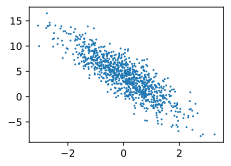

In [4]:
d2l.set_figsize()

d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order. 
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
    

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.4835, -1.7703],
        [ 0.1837, -0.2542],
        [ 0.6587,  0.7924],
        [ 0.1009, -0.3152],
        [-0.5814,  0.0881],
        [ 1.2191, -1.5238],
        [ 2.3018,  0.0454],
        [-0.9448,  0.5729],
        [ 1.0647, -0.0446],
        [ 1.1512, -0.2142]]) 
 tensor([[ 7.2402],
        [ 5.4281],
        [ 2.8149],
        [ 5.4820],
        [ 2.7338],
        [11.8254],
        [ 8.6390],
        [ 0.3565],
        [ 6.4884],
        [ 7.2266]])


In [50]:
# TESTING
a = list(range(0,1000,1))
a[995: min(995+10, 1000)]

[995, 996, 997, 998, 999]

In [32]:
# TESTING
indices_2 = list(range(1000))
random.shuffle(indices_2)
for i in range(0, 1000, 10):
    batch_indices = torch.tensor(
            indices_2[i: min(i + 10, 1000)])
print(batch_indices)

tensor([448, 557, 299, 946, 284, 747, 486, 654, 487, 622])


In [7]:
# Initializing parameters

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
# w = torch.zeros(2, requires_grad=True) 
## TEST EXAMPLE WITH PARAM = 0 ^^^
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b


In [9]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # compute gradient on 'l' wrt ['w', 'b']
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.048559
epoch 2, loss 0.000200
epoch 3, loss 0.000050


In [12]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0009, -0.0009], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0006], grad_fn=<RsubBackward1>)
